<a href="https://colab.research.google.com/github/TannaPrasanthkumar/LoanPrediction/blob/main/Dropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
x_train = np.linspace(-1,1,20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
x_test = np.linspace(-1,1,20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

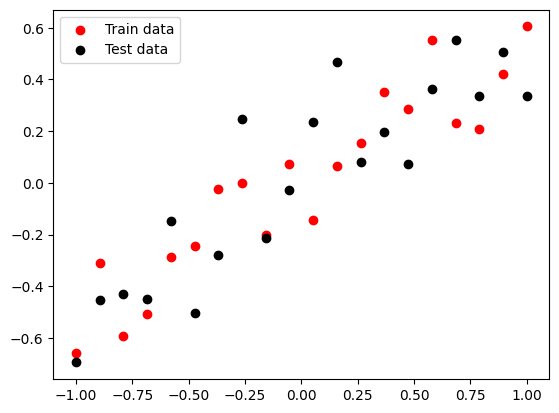

In [7]:
plt.scatter(x_train,y_train,c='red',label='Train data')
plt.scatter(x_test,y_test,c='black',label='Test data')
plt.legend()
plt.show()

In [13]:
model1 = Sequential()

In [14]:
model1.add(Dense(128,activation='relu',input_dim=1))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='linear'))

In [15]:
adam = Adam(learning_rate=0.01)

In [16]:
model1.compile(optimizer=adam,loss="mse",metrics=["mse"])

In [18]:
history = model1.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),verbose=False)

In [20]:
#Evaluation of the model

train_mse = model1.evaluate(x_train,y_train,verbose=0)
test_mse = model1.evaluate(x_test,y_test,verbose=0)
print('Trian Error : {} , Test Error : {}'.format(train_mse,test_mse))

Trian Error : [0.011445624753832817, 0.011445624753832817] , Test Error : [0.03653469681739807, 0.03653469681739807]


In [21]:
y_pred = model1.predict(x_test)

1/1 [==============================] - 0s 101ms/step


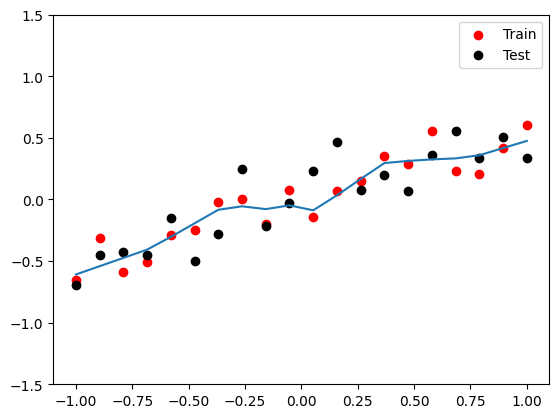

In [23]:
plt.figure()
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='black',label='Test')
plt.plot(x_test,y_pred)
plt.ylim((-1.5,1.5))
plt.legend()
plt.show()

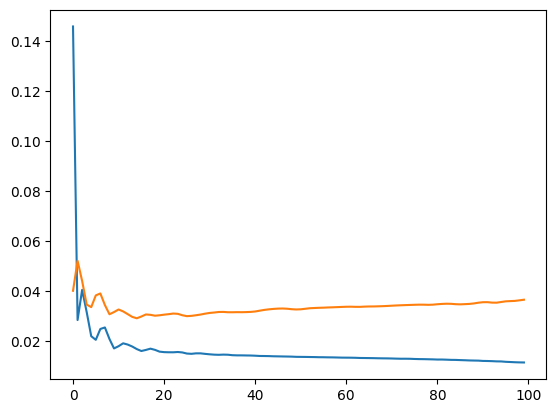

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [28]:
model2 = Sequential()

model2.add(Dense(128,activation='relu',input_dim=1))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='linear'))

In [29]:
adam = Adam(learning_rate=0.01)

In [30]:
model2.compile(optimizer=adam,loss='mse',metrics=['mse'])

In [31]:
history1 = model2.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),verbose=False)

In [33]:
#Evaluation of the model

train_mse = model2.evaluate(x_train,y_train,verbose=0)
test_mse = model2.evaluate(x_test,y_test,verbose=0)
print('Trian Error : {} , Test Error : {}'.format(train_mse,test_mse))

Trian Error : [0.014349791221320629, 0.014349791221320629] , Test Error : [0.031527645885944366, 0.031527645885944366]


In [34]:
y_pred2 = model2.predict(x_test)

1/1 [==============================] - 0s 71ms/step


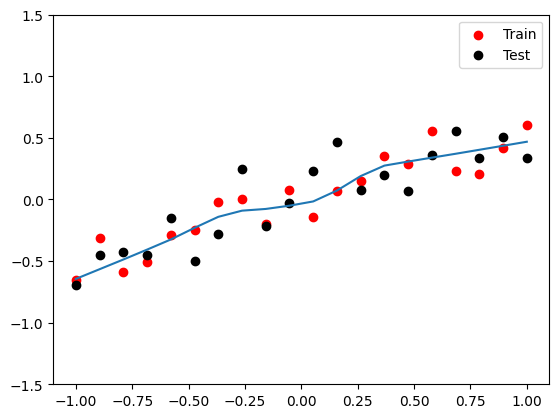

In [35]:
plt.figure()
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='black',label='Test')
plt.plot(x_test,y_pred2)
plt.ylim((-1.5,1.5))
plt.legend()
plt.show()

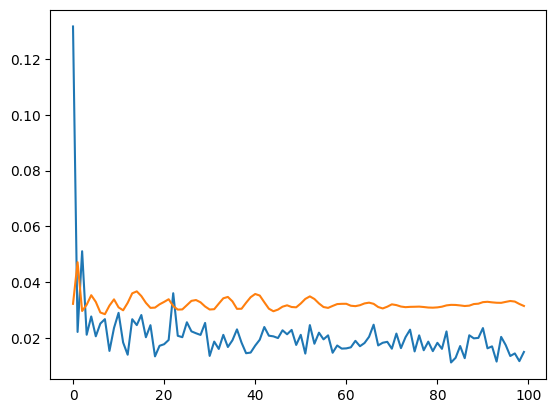

In [36]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()

In [38]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=1, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_3.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_3.fit(x_train, y_train, epochs=500,
                               validation_data = (x_test, y_test),
                               verbose=False)

In [39]:
#Evaluation of the model

train_mse = model_3.evaluate(x_train,y_train,verbose=0)
test_mse = model_3.evaluate(x_test,y_test,verbose=0)
print('Trian Error : {} , Test Error : {}'.format(train_mse,test_mse))

Trian Error : [0.014005511999130249, 0.014005511999130249] , Test Error : [0.03856884315609932, 0.03856884315609932]
